In [39]:
import networkx as nx
import numpy as np
import preprocessing as pre
import drawing as draw
from energy import sparse_capy
import ising
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
from ipywidgets import IntProgress
from IPython.display import HTML


In [2]:
config_file = 'sample_config.txt'
dual_graph, repvote, demvote, dists, pos, node_size = pre.get_data(config_file)

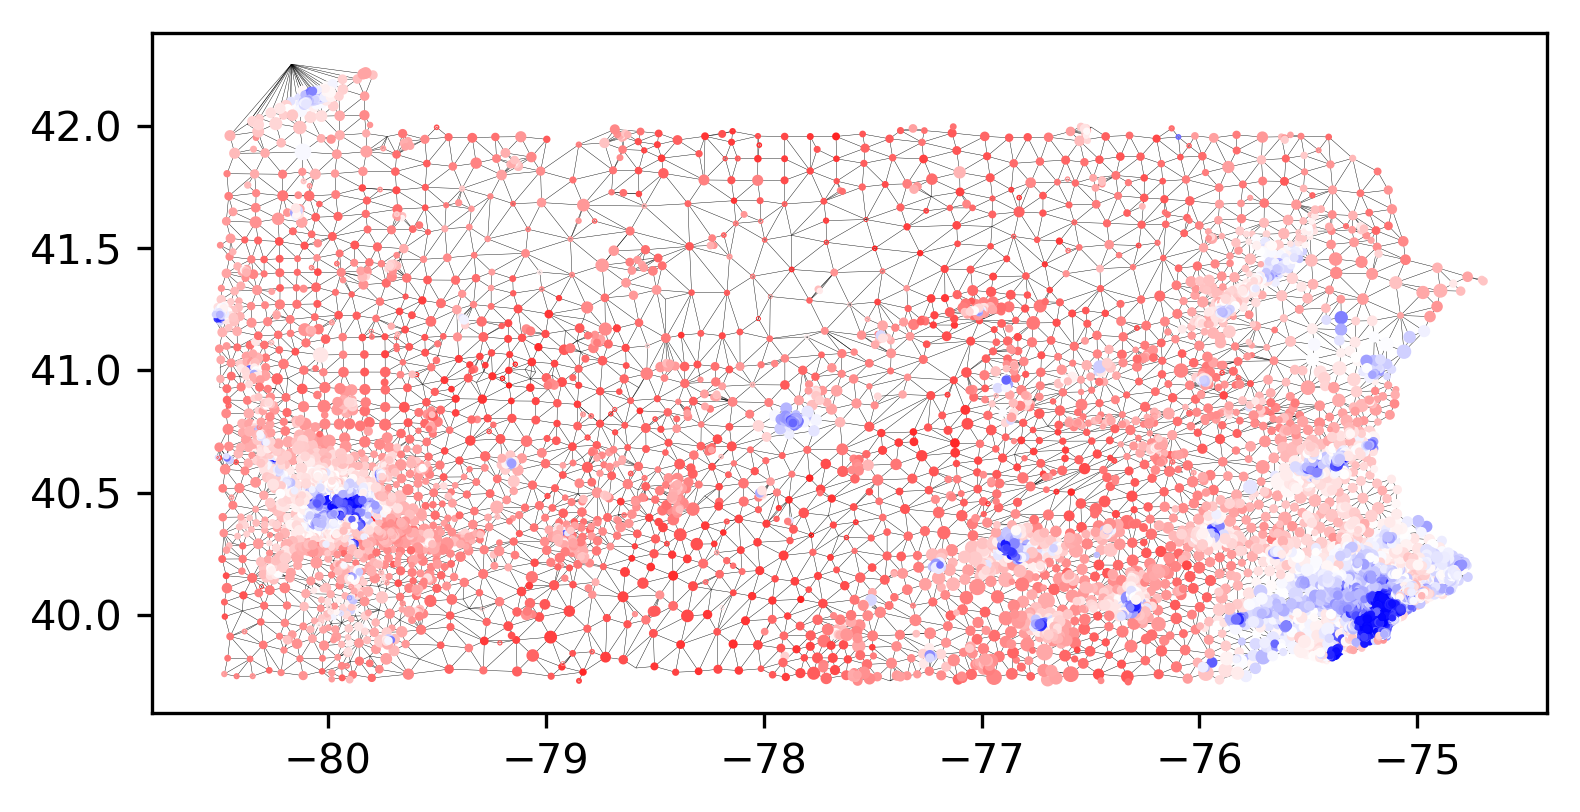

In [14]:
draw.draw_state(dual_graph, demvote, repvote, pos, node_size)

In [57]:
# get adjacency matrix 
A = nx.to_scipy_sparse_matrix(dual_graph)
# setup ising simulation
sim = ising.ising(repvote, demvote, A, target=0.0, beta=2**35, steps=100000)

In [58]:
%%time
i = 1
seats = []
scores = []
demvecs = []
repvecs = []
nframes = 100
for newrepvote, newdemvote, score in tqdm(sim):
    seats.append(dems_seat_share(newdemvote, newrepvote, dists))
    scores.append(score)
    if i % (len(sim) / nframes) == 0:
        demvecs.append(newdemvote)
        repvecs.append(newrepvote)
    i += 1


CPU times: user 15min 45s, sys: 15.9 s, total: 16min 1s
Wall time: 16min 25s


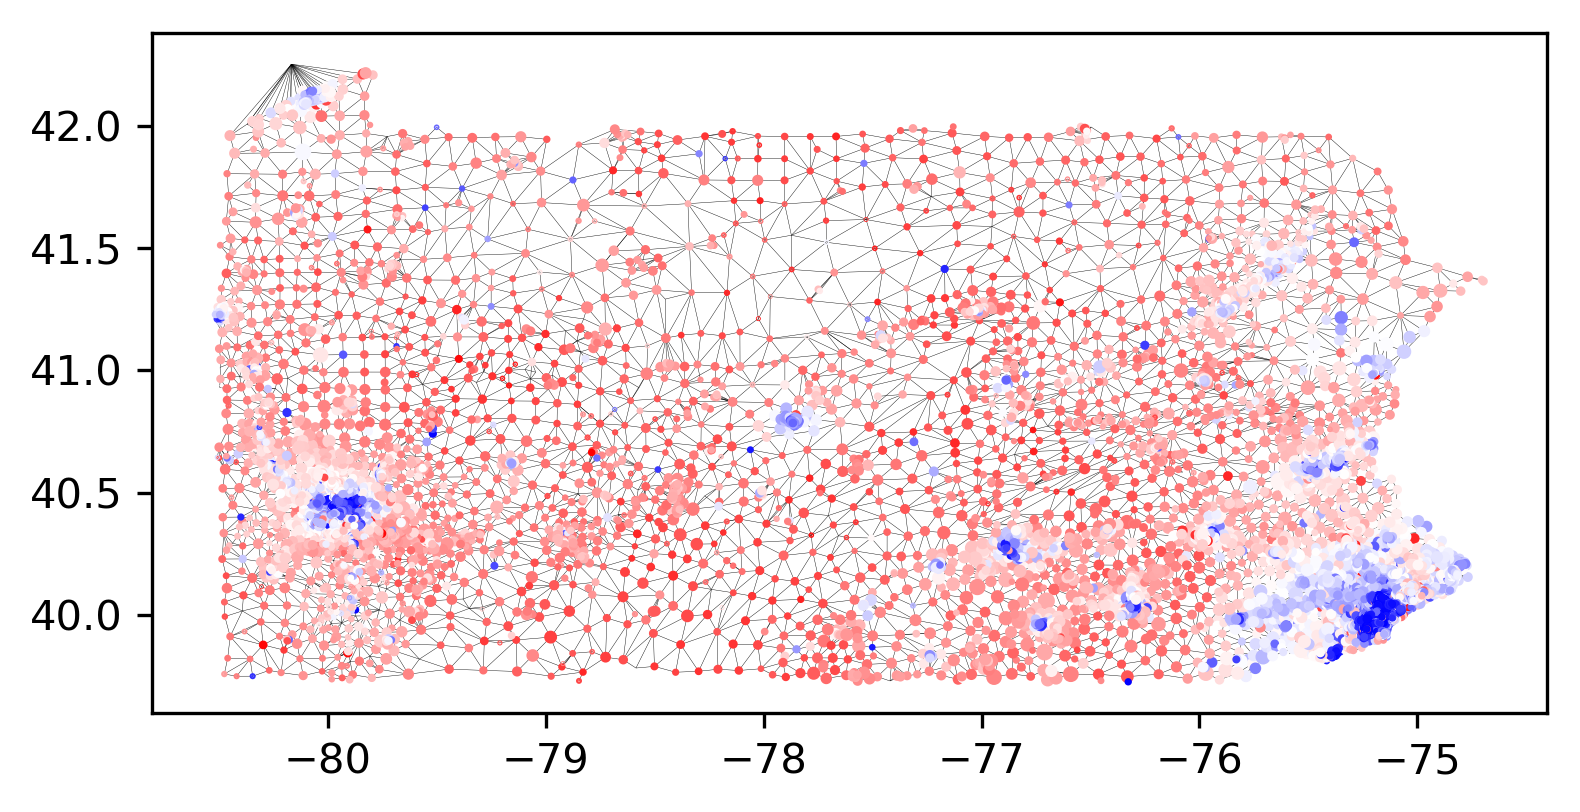

In [9]:
draw.draw_state(dual_graph, newdemvote, newrepvote, pos, node_size)

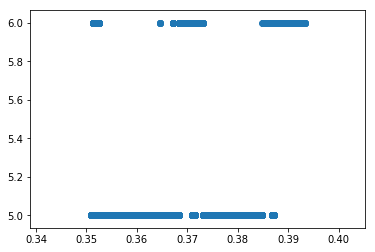

In [18]:
plt.scatter(scores, seats)
plt.show()

In [6]:
def dems_seat_share(dems, repubs, districtings):
    seats = 0
    for i in np.unique(districtings):
        result = np.sum(dems[districtings == i] - repubs[districtings == i])
        if result > 0:
            seats +=1.0
        elif result == 0:
            seats += 0.5
    return seats   

In [52]:
import importlib
importlib.reload(draw)

<module 'drawing' from '/Users/marshallmueller/Desktop/vrdi2018/newIsing/Ising/real_world/drawing.py'>

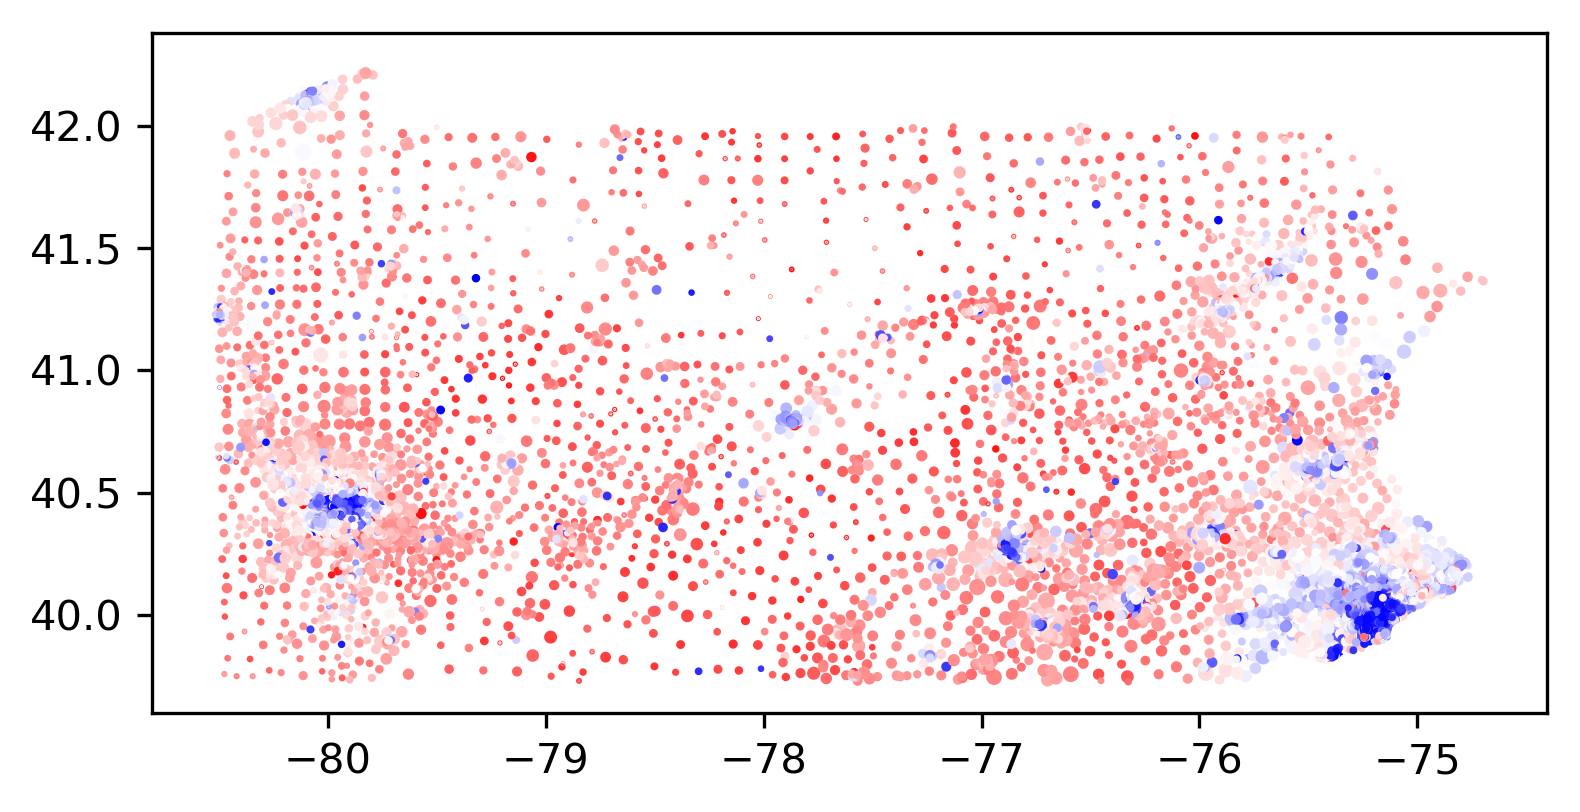

In [59]:
anim = draw.ising_anim(dual_graph, demvecs, repvecs, pos, node_size)
HTML(anim.to_html5_video())

In [49]:
# todo:
# draw with seat share and energy listed

[[507.]
 [500.]
 [491.]
 ...
 [  0.]
 [284.]
 [257.]]
